# CS 7641 HW1 Code - Supervised Learning

"""
Student Name: Elie Chalhoub
GT User ID: echalhoub3
GT ID: 903387154
"""

Datasets:
a)Default of credit card clients
b)Bank Marketing Data Set 



## Importing Required Libraries

In [1]:
# Load libraries
import time
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import AdaBoostClassifier# Import the Adaptive Boosting Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()




## Load Credit Card Datasets

In [2]:
df_ccc = pd.read_csv('default_of_credit_card_clients.csv',delimiter=',')
df_ccc.head()
ccc_row_count = df_ccc.shape[0]  # gives number of row count
ccc_col_count = df_ccc.shape[1]  # gives number of col count

print ccc_row_count , "rows."
print ccc_col_count , "columns."


df_caesarian = pd.read_csv('caesarian.csv',delimiter=',')
caes_row_count = df_caesarian.shape[0]  # gives number of row count
caes_col_count = df_caesarian.shape[1]  # gives number of col count

print caes_row_count , "rows."
print caes_col_count , "columns."

30000 rows.
24 columns.
80 rows.
6 columns.


In [4]:
y = df_ccc['DEFAULTS_NEXT_MONTH']
X = df_ccc.drop(['DEFAULTS_NEXT_MONTH'], axis=1)

y1 = df_caesarian['y']
X1 = df_caesarian.drop(['y'], axis=1)



## Split the data into training dataset and test dataset

In [7]:
# Split dataset into training set (70%) and test set (30%)
#Split the credit card dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
#Split the Caeserian dataset
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=1) 


## Build the decision tree model (Credit Card Data)

Training time for a Decision Tree without Pruning 0.460817098618 seconds!


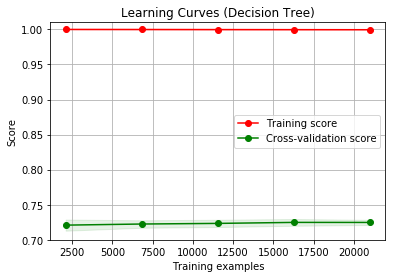

In [56]:
#Create a Decision Tree Model using Scikit-learn.
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer (Credit Card data set)
start = time.time()
clf = clf.fit(X_train,y_train)
end = time.time()
print "Training time for a Decision Tree without Pruning", end - start , "seconds!"

#Predict the response for test dataset (Credit Card dataset)
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)




# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 30% data randomly selected as a validation set.
title = "Learning Curves (Decision Tree)"

cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=1)

plot_learning_curve(clf, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()




## Evaluate the model

Normalized confusion matrix
[[0.814 0.186]
 [0.591 0.409]]


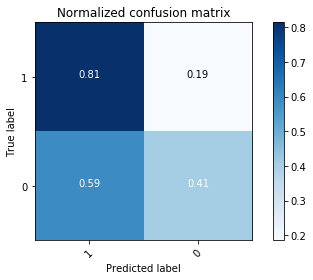

('Report: ', u'             precision    recall  f1-score   support\n\n          0       0.83      0.81      0.82      7000\n          1       0.39      0.41      0.40      2000\n\navg / total       0.73      0.72      0.73      9000\n')
('Train Accuracy Score: ', 0.9993333333333333)
('Test Accuracy Score: ', 0.724)


In [57]:
#Model accuracy is computed by comparing actual test set values and predicted ones.
cnf_matrix = confusion_matrix(y_test, y_pred)
# Plot normalized confusion matrix
plt.figure()
class_names = class_names=['1','0']
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print("Report: ", classification_report(y_test, y_pred))
print("Train Accuracy Score: ", accuracy_score(y_train, y_train_pred))
print("Test Accuracy Score: ", accuracy_score(y_test, y_pred))


In [36]:
#export_graphviz function converts decision tree classifier into dot
#file and pydotplus convert this dot file to png or displayable form 
#on Jupyter.


from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = X_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('creditDefault.png')
Image(graph.create_png())

KeyboardInterrupt: 

The resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. Next section, I will optimize by pruning.  The pruning method I will use is one where I chose a maximum depth 

Training time for a Decision Tree without Pruning 0.107381820679 seconds!


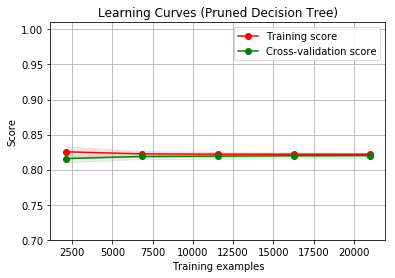

In [58]:
#pruning
#Selecting a maximum depth of 3 for example and comparing model accuracy: 
max_depth=3
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
start = time.time()
clf = clf.fit(X_train,y_train)
end = time.time()
print "Training time for a Decision Tree without Pruning", end - start , "seconds!"



#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 30% data randomly selected as a validation set.
title = "Learning Curves (Pruned Decision Tree)"

#cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=1)

plot_learning_curve(clf, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()



# Evaluating the model accuracy

('Report: ', u'             precision    recall  f1-score   support\n\n          0       0.84      0.95      0.89      7000\n          1       0.67      0.36      0.47      2000\n\navg / total       0.80      0.82      0.80      9000\n')
('Train Accuracy Score: ', 0.8236190476190476)
('Test Accuracy Score: ', 0.8182222222222222)
Normalized confusion matrix
[[0.94885714 0.05114286]
 [0.639      0.361     ]]


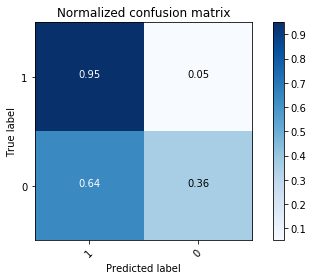

In [38]:
#Model accuracy is computed by comparing actual test set values and predicted ones.

print("Report: ", classification_report(y_test, y_pred))
print("Train Accuracy Score: ", accuracy_score(y_train, y_train_pred))
print("Test Accuracy Score: ", accuracy_score(y_test, y_pred))


#Model accuracy is computed by comparing actual test set values and predicted ones.
cnf_matrix_pruned = confusion_matrix(y_test, y_pred)
# Plot normalized confusion matrix
plt.figure()
class_names = class_names=['1','0']
plot_confusion_matrix(cnf_matrix_pruned, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()






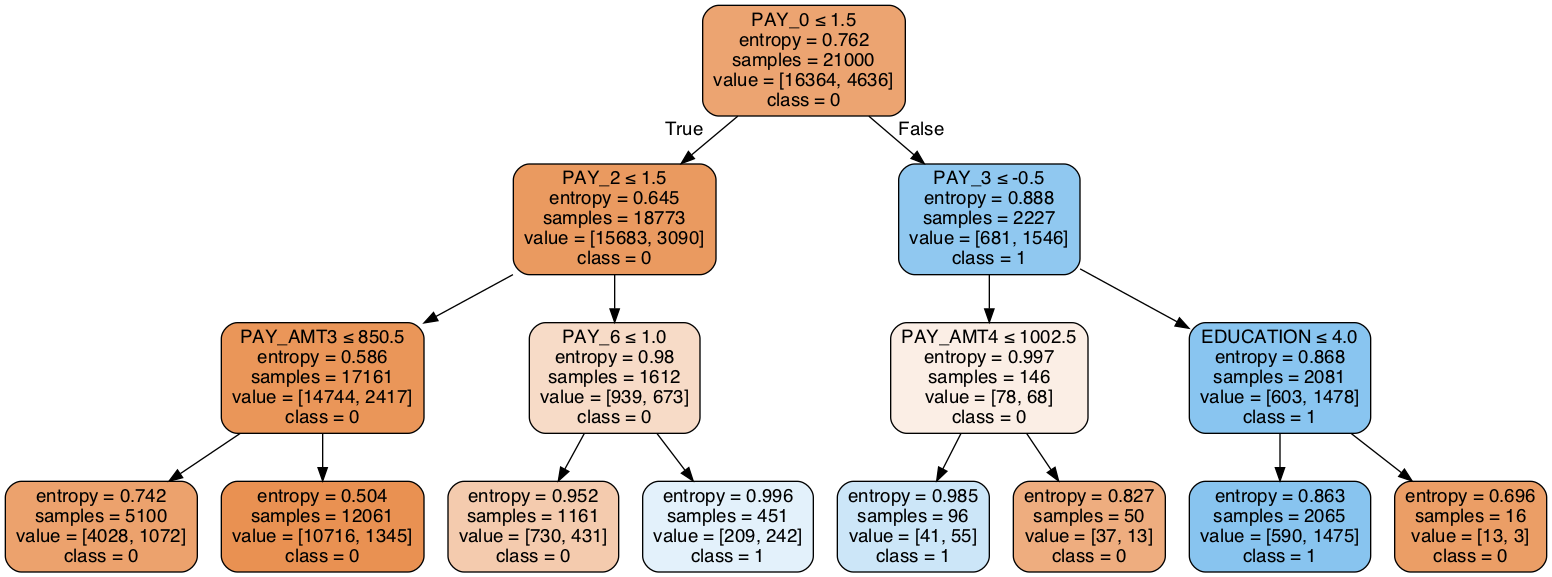

In [39]:
#Draw the pruned tree:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = X_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('creditDefaultPruned.png')
Image(graph.create_png())

#This pruned model is less complex, explainable, and easy to understand than the previous decision tree model plot.

## Building the Adaptive Boosting model version of the above decision tree. 

AdaBoost algorithm work as follows:

1) Initially, Adaboost selects a training subset randomly.
2) It iteratively trains the AdaBoost machine learning model by selecting the training set based on the accurate prediction of the last training.
3) It assigns the higher weight to wrong classified observations so that in the next iteration these observations will get the high probability for classification.
4) Also, It assigns the weight to the trained classifier in each iteration according to the accuracy of the classifier. The more accurate classifier will get high weight.
5) This process iterate until the complete training data fits without any error or until reached to the specified maximum number of estimators.
6) To classify, perform a "vote" across all of the learning algorithms you built.


Training time for a Decision Tree without Pruning 1.54597401619 seconds!


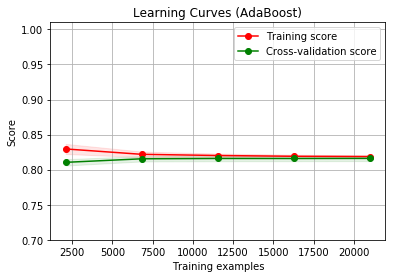

In [59]:
#The AdaBoost Model using Scikit-learn. AdaBoost uses Decision Tree Classifier as default Classifier.
#The base_estimator: It is a weak learner used to train the model. It uses DecisionTreeClassifier as default weak learner for training purpose. You can also specify different machine learning algorithms.
#The n_estimators: Number of weak learners to train iteratively.
#The learning_rate: It contributes to the weights of weak learners. It uses 1 as a default value.

abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
# Train Adaboost Classifer
start = time.time()
model = abc.fit(X_train, y_train)
end = time.time()
print "Training time for a AdaBoost", end - start , "seconds!"


#Predict the response for test dataset
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

title = "Learning Curves (AdaBoost)"

plot_learning_curve(model, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

 

('Report: ', u'             precision    recall  f1-score   support\n\n          0       0.83      0.96      0.89      7000\n          1       0.68      0.30      0.42      2000\n\navg / total       0.79      0.81      0.78      9000\n')
('Train Accuracy Score: ', 0.8189047619047619)
('Test Accuracy Score: ', 0.813)
Normalized confusion matrix
[[0.95942857 0.04057143]
 [0.6995     0.3005    ]]


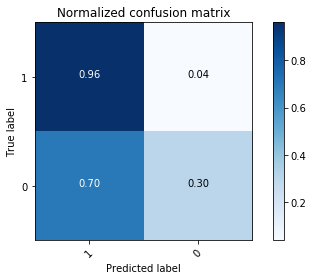

In [60]:
# Model Accuracy, how often is the classifier correct?
print("Report: ", classification_report(y_test, y_pred))
print("Train Accuracy Score: ", accuracy_score(y_train, y_train_pred))
print("Test Accuracy Score: ", accuracy_score(y_test, y_pred))
plt.figure()
class_names = class_names=['1','0']
adaCM = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(adaCM, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()



# Build the decision tree model (Caeserian Data)

Training time for a Decision Tree without Pruning 0.00197792053223 seconds!


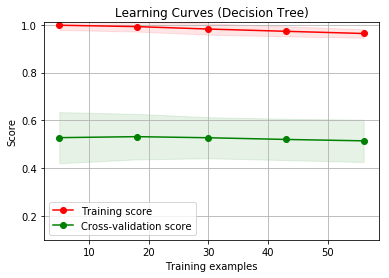

In [61]:
# Create a Decision Tree Model using Scikit-learn.
clf1 = DecisionTreeClassifier()

# Train Decision Tree Classifer (Caeserian set)
start = time.time()
clf1 = clf1.fit(X_train1,y_train1)
end = time.time()
print "Training time for a Decision Tree without Pruning", end - start , "seconds!"


#Predict the response for test dataset (Bank dataset)
y_pred1 = clf1.predict(X_test1)
y_train_pred1 = clf1.predict(X_train1)

#Plot the learning curves.
title = "Learning Curves (Decision Tree)"

plot_learning_curve(clf1, title, X1, y1, ylim=(0.1, 1.01), cv=cv, n_jobs=4)

plt.show()




## Evaluate the model

('Accuracy:', 0.4583333333333333)
Normalized confusion matrix
[[0.4 0.6]
 [0.5 0.5]]


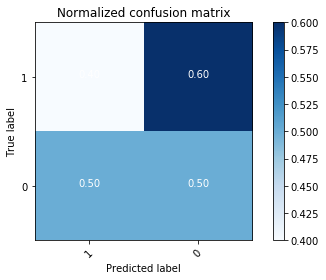

('Report: ', u'             precision    recall  f1-score   support\n\n          0       0.36      0.40      0.38        10\n          1       0.54      0.50      0.52        14\n\navg / total       0.47      0.46      0.46        24\n')
('Train Accuracy Score: ', 0.9642857142857143)
('Test Accuracy Score: ', 0.4583333333333333)


In [62]:
#Model accuracy is computed by comparing actual test set values and predicted ones.
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))
#Model accuracy is computed by comparing actual test set values and predicted ones.
cnf_matrix1 = confusion_matrix(y_test1, y_pred1)
# Plot normalized confusion matrix
plt.figure()
class_names = class_names=['1','0']
plot_confusion_matrix(cnf_matrix1, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print("Report: ", classification_report(y_test1, y_pred1))
print("Train Accuracy Score: ", accuracy_score(y_train1, y_train_pred1))
print("Test Accuracy Score: ", accuracy_score(y_test1, y_pred1))

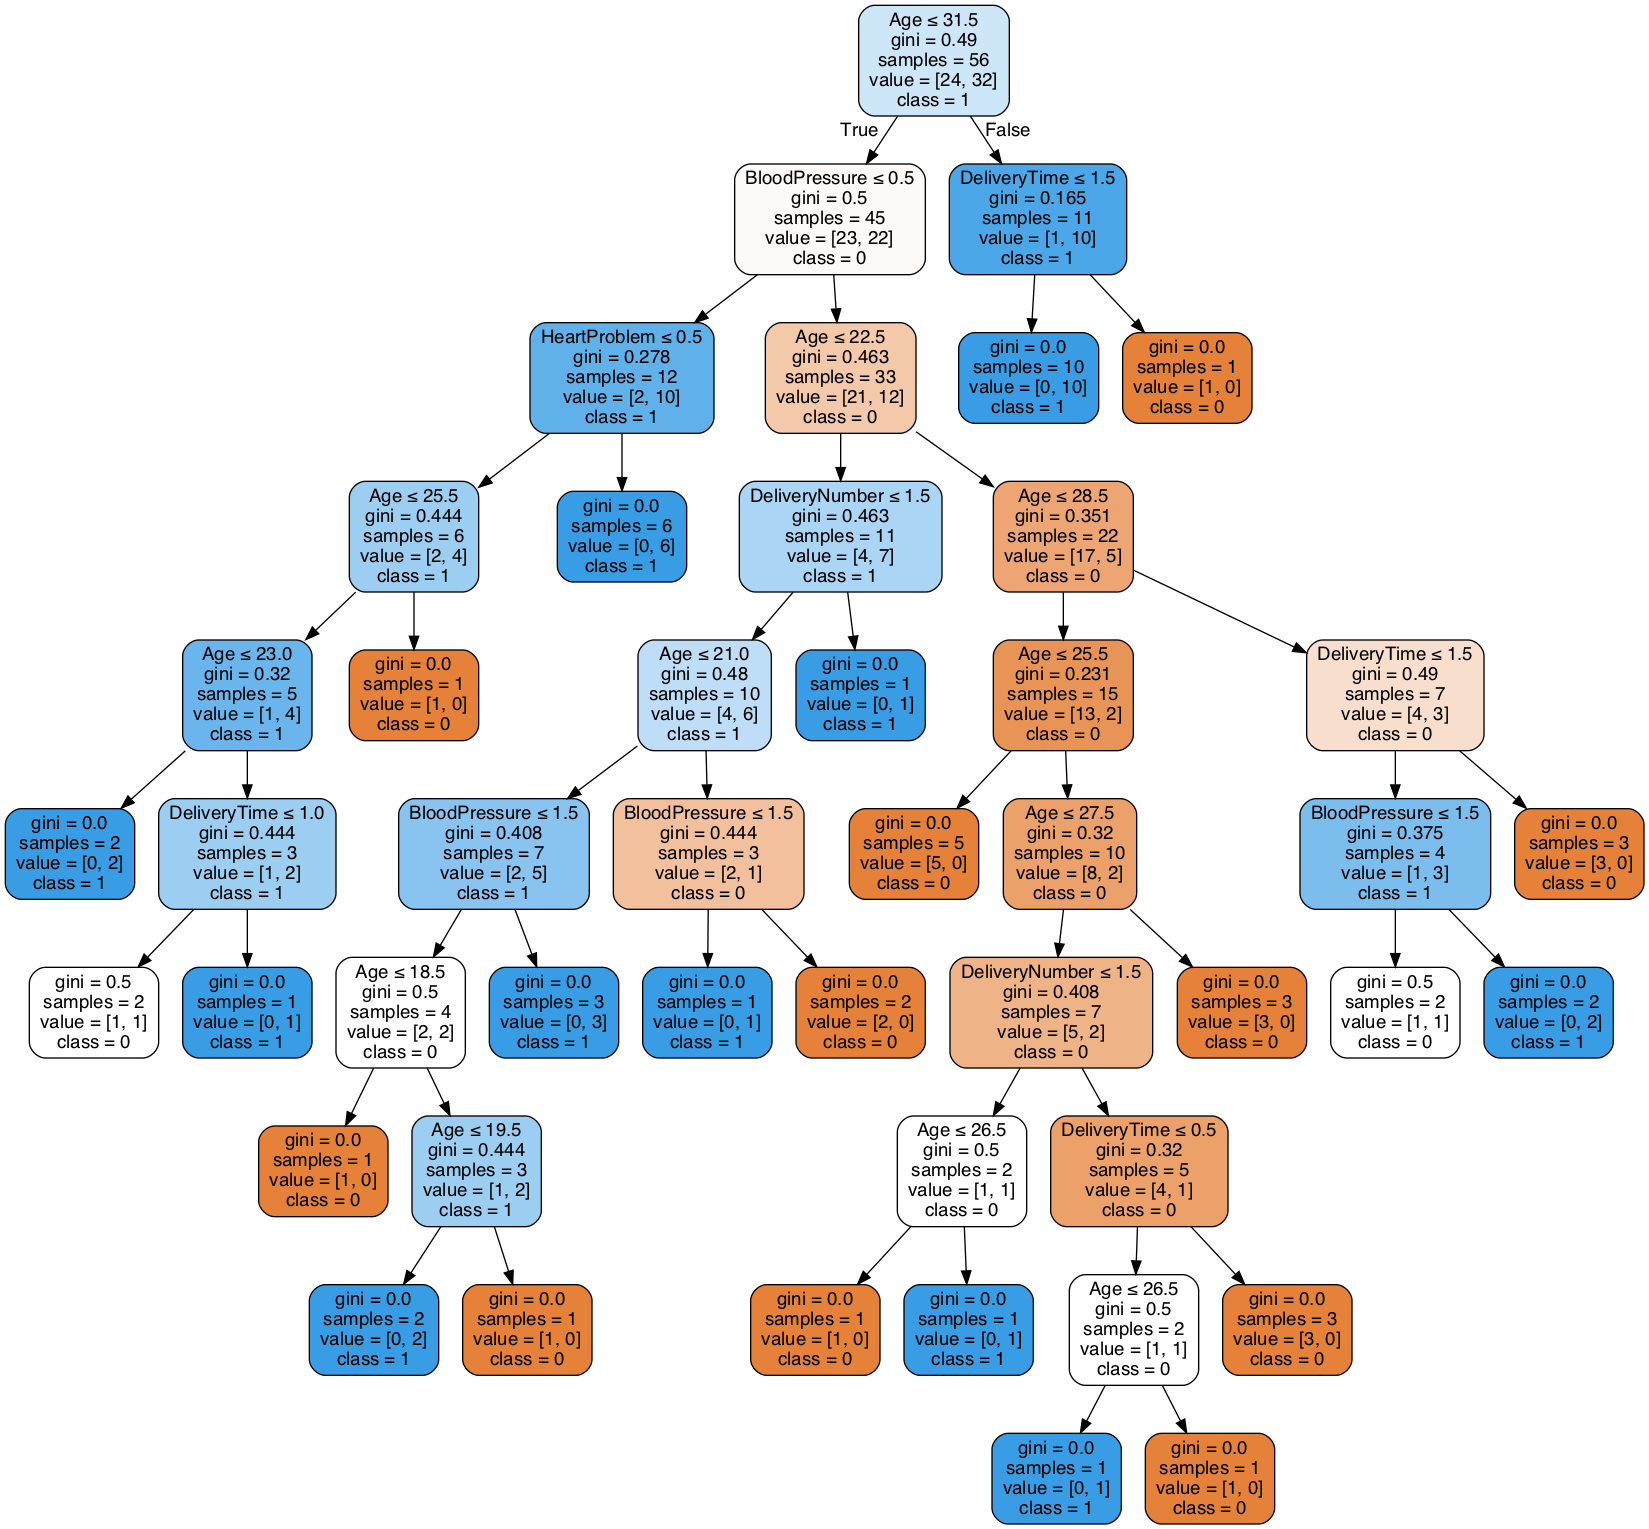

In [50]:
#export_graphviz function converts decision tree classifier into dot
#file and pydotplus convert this dot file to png or displayable form 
#on Jupyter.


from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = X_train1.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('caeserian.png')
Image(graph.create_png())

Training time for a Prunded Decision Tree 0.00185203552246 seconds!
('Accuracy:', 0.4166666666666667)
Normalized confusion matrix
[[0.4        0.6       ]
 [0.57142857 0.42857143]]


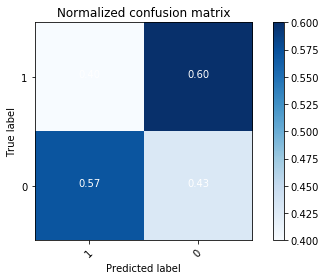

('Report: ', u'             precision    recall  f1-score   support\n\n          0       0.33      0.40      0.36        10\n          1       0.50      0.43      0.46        14\n\navg / total       0.43      0.42      0.42        24\n')
('Train Accuracy Score: ', 0.8035714285714286)
('Test Accuracy Score: ', 0.4166666666666667)


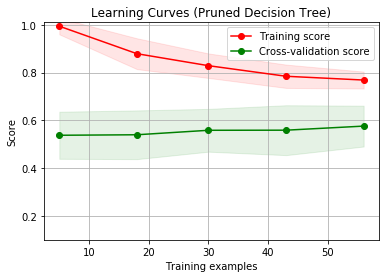

In [54]:
#pruning
#Selecting a maximum depth of 3 for example and comparing model accuracy: 
max_depth=3
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)

# Train Decision Tree Classifer
start = time.time()
clf1 = clf1.fit(X_train1,y_train1)
end = time.time()
print "Training time for a Prunded Decision Tree", end - start , "seconds!"



#Predict the response for test dataset
y_pred1 = clf1.predict(X_test1)
y_train_pred1 = clf1.predict(X_train1)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

cnf_matrix1 = confusion_matrix(y_test1, y_pred1)
# Plot normalized confusion matrix
plt.figure()
class_names = class_names=['1','0']
plot_confusion_matrix(cnf_matrix1, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print("Report: ", classification_report(y_test1, y_pred1))
print("Train Accuracy Score: ", accuracy_score(y_train1, y_train_pred1))
print("Test Accuracy Score: ", accuracy_score(y_test1, y_pred1))


#Plot the learning curves.
title = "Learning Curves (Pruned Decision Tree)"

plot_learning_curve(clf1, title, X1, y1, ylim=(0.1, 1.01), cv=cv, n_jobs=4)

plt.show()



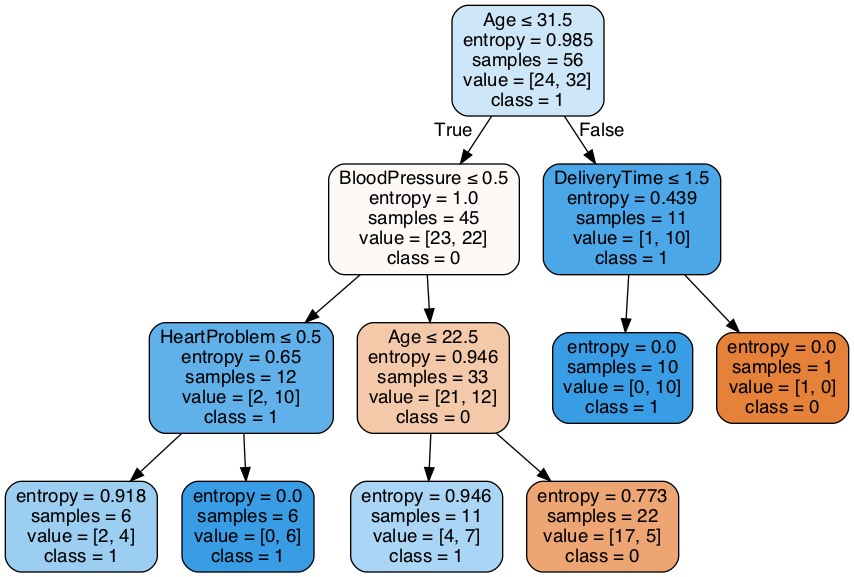

In [55]:
#Draw the pruned tree:
dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = X_train1.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('caeserianPruned.png')
Image(graph.create_png())

#This pruned model is less complex, explainable, and easy to understand than the previous decision tree model plot.

# Adaptive boost (Caeserian)

Training time for a adaptive boost 0.15515422821 seconds!
('Test Accuracy Score: ', 0.4166666666666667)


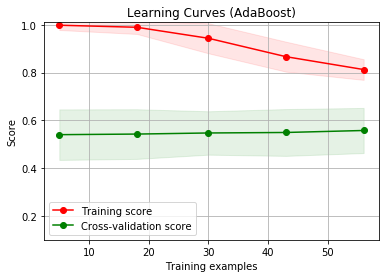

In [63]:
#The AdaBoost Model using Scikit-learn. AdaBoost uses Decision Tree Classifier as default Classifier.
#The base_estimator: It is a weak learner used to train the model. It uses DecisionTreeClassifier as default weak learner for training purpose. You can also specify different machine learning algorithms.
#The n_estimators: Number of weak learners to train iteratively.
#The learning_rate: It contributes to the weights of weak learners. It uses 1 as a default value.

abc1 = AdaBoostClassifier(n_estimators=50,learning_rate=1)
# Train Adaboost Classifer
start = time.time()
model1 = abc1.fit(X_train1, y_train1)
end = time.time()
print "Training time for a adaptive boost", end - start , "seconds!"


#Predict the response for test dataset
y_pred1 = model1.predict(X_test1)
y_train_pred1 = model1.predict(X_train1)

# Create adaboost classifer object
acc1 = accuracy_score(y_test1, y_pred1)
print("Test Accuracy Score: ", acc1)
    
#Plot the learning curves.
title = "Learning Curves (AdaBoost)"

plot_learning_curve(model1, title, X1, y1, ylim=(0.1, 1.01), cv=cv, n_jobs=4)

plt.show()




('Report: ', u'             precision    recall  f1-score   support\n\n          0       0.30      0.30      0.30        10\n          1       0.50      0.50      0.50        14\n\navg / total       0.42      0.42      0.42        24\n')
('Train Accuracy Score: ', 0.8392857142857143)
('Test Accuracy Score: ', 0.4166666666666667)
Normalized confusion matrix
[[0.3 0.7]
 [0.5 0.5]]


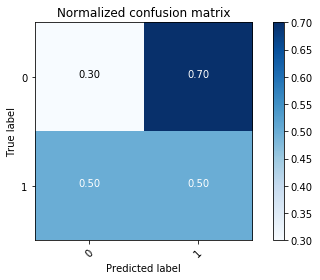

In [64]:
# Model Accuracy, how often is the classifier correct?
print("Report: ", classification_report(y_test1, y_pred1))
print("Train Accuracy Score: ", accuracy_score(y_train1, y_train_pred1))
print("Test Accuracy Score: ", accuracy_score(y_test1, y_pred1))
plt.figure()
class_names = class_names=['0','1']
adaCM1 = confusion_matrix(y_test1, y_pred1)
plot_confusion_matrix(adaCM1, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


## Neural Network Model (Credit Cards)

In [65]:
#Using Keras for building a Convolution Neural Network Model
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.utils.np_utils import to_categorical


Using TensorFlow backend.


We will use a batch size of 64 using a higher batch size of 128 or 256 is also preferable it all depends on the memory. It contributes massively to determining the learning parameters and affects the prediction accuracy. We will train the network for 20 epochs.

In [54]:
#batch_size = 64
#epochs = 20
#num_classes = 10

Neural Network Architecture

I used the Leaky ReLU activation function which helps the network learn non-linear decision boundaries. 
The ReLU activation function is used a lot in neural network architectures and more specifically in convolutional networks, where it has proven to be more effective than the widely used logistic sigmoid function. As of 2017, this activation function is the most popular one for deep neural networks. The ReLU function allows the activation to be thresholded at zero. However, during the training, ReLU units can "die". This can happen when a large gradient flows through a ReLU neuron: it can cause the weights to update in such a way that the neuron will never activate on any data point again. If this happens, then the gradient flowing through the unit will forever be zero from that point on. Leaky ReLUs attempt to solve this: the function will not be zero but will instead have a small negative slope.

 

Neural Network training time 1.54027485847 seconds!
Neural Network training time 1.04511904716 seconds!
Neural Network training time 1.50881481171 seconds!
Neural Network training time 1.43046092987 seconds!
Neural Network training time 1.6766910553 seconds!
Neural Network training time 1.53243279457 seconds!
Neural Network training time 1.09897708893 seconds!
Neural Network training time 1.39452004433 seconds!
Neural Network training time 0.824001789093 seconds!
Neural Network training time 1.98592090607 seconds!
Neural Network training time 1.12055182457 seconds!
Neural Network training time 1.27437114716 seconds!
Neural Network training time 0.922505140305 seconds!
Neural Network training time 1.88565587997 seconds!
Neural Network training time 1.62642407417 seconds!
Neural Network training time 0.950834035873 seconds!
Neural Network training time 1.49981188774 seconds!
Neural Network training time 0.736329078674 seconds!
Neural Network training time 2.74212288857 seconds!
Neural Ne

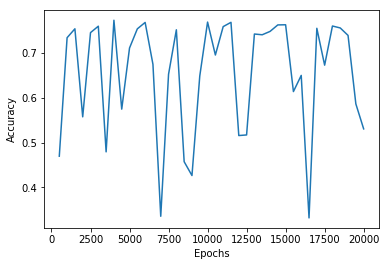

Process PoolWorker-593:
Process PoolWorker-595:
Process PoolWorker-594:
Process PoolWorker-596:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/eliechalhoub/anaconda2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/Users/eliechalhoub/anaconda2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/Users/eliechalhoub/anaconda2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/Users/eliechalhoub/anaconda2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
    self.run()
    self.run()
    self.run()
    self.run()
  File "/Users/eliechalhoub/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/Users/eliechalhoub/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/Users/eliechalhoub/anaconda2/lib/python2.7/multiprocessing/process.py", line 11

In [ ]:
from sklearn.neural_network import MLPClassifier
# Create a Neural Net classifer object

#max_iter
maxEpoch = 20500
df_acc = pd.DataFrame(columns=['epochs','acc'])
for x in range(500, maxEpoch,500):
    nnClf = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=x, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
    # Train Neural Network Classifer
    start = time.time()
    model = nnClf.fit(X_train, y_train)
    end = time.time()
    print "Neural Network training time", end - start , "seconds!"
    #Predict the response for test dataset
    y_predNN = model.predict(X_test)
    acc = accuracy_score(y_test, y_predNN)
    df_acc = df_acc.append({'epochs': x, 'acc':acc}, ignore_index=True)
 
print df_acc

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(df_acc['epochs'],df_acc['acc'])
plt.show()



In [38]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predNN))


from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_predNN))

print(classification_report(y_test,y_predNN))

('Accuracy:', 0.744)
[[6417  583]
 [1721  279]]
             precision    recall  f1-score   support

          0       0.79      0.92      0.85      7000
          1       0.32      0.14      0.19      2000

avg / total       0.69      0.74      0.70      9000



# Neural Network (Cesarean)

Neural Network training time 0.0141410827637 seconds!
Neural Network training time 0.190181016922 seconds!
Neural Network training time 0.0101430416107 seconds!
Neural Network training time 0.204940080643 seconds!
Neural Network training time 0.0127389431 seconds!
Neural Network training time 0.00658798217773 seconds!
Neural Network training time 0.00487399101257 seconds!
Neural Network training time 0.00461602210999 seconds!
Neural Network training time 0.00476002693176 seconds!
Neural Network training time 0.00945711135864 seconds!
Neural Network training time 0.00508999824524 seconds!
Neural Network training time 0.219205856323 seconds!
Neural Network training time 0.00445985794067 seconds!
Neural Network training time 0.00557684898376 seconds!
Neural Network training time 0.0109710693359 seconds!
Neural Network training time 0.00453615188599 seconds!
Neural Network training time 0.00617814064026 seconds!
Neural Network training time 0.0111999511719 seconds!
Neural Network training 

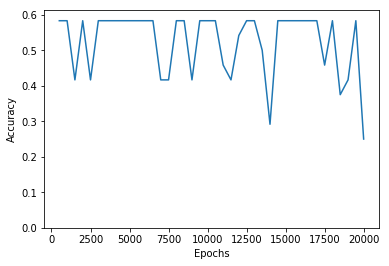

In [65]:
#max_iter
maxEpoch = 20500
df_acc1 = pd.DataFrame(columns=['epochs','acc'])
for x in range(500, maxEpoch,500):
    nnClf1 = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=x, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
    # Train Neural Network Classifer
    start = time.time()
    model1 = nnClf1.fit(X_train1, y_train1)
    end = time.time()
    print "Neural Network training time", end - start , "seconds!"
    #Predict the response for test dataset
    y_predNN1 = model1.predict(X_test1)
    acc1 = accuracy_score(y_test1, y_predNN1)
    df_acc1 = df_acc1.append({'epochs': x, 'acc':acc1}, ignore_index=True)
 
print df_acc1

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(df_acc1['epochs'],df_acc1['acc'])

plt.show()



## KNN Model (Credit Cards)

KNN training time 0.0378029346466 seconds!
KNN training time 0.026397228241 seconds!
KNN training time 0.0229609012604 seconds!
KNN training time 0.0228650569916 seconds!
KNN training time 0.0241799354553 seconds!
KNN training time 0.0240211486816 seconds!
KNN training time 0.0227599143982 seconds!
KNN training time 0.0247991085052 seconds!
KNN training time 0.0225150585175 seconds!
KNN training time 0.02321600914 seconds!
KNN training time 0.0229859352112 seconds!
KNN training time 0.0234091281891 seconds!
KNN training time 0.0227291584015 seconds!
KNN training time 0.0231308937073 seconds!
KNN training time 0.0255029201508 seconds!
KNN training time 0.0233719348907 seconds!
KNN training time 0.0233108997345 seconds!
KNN training time 0.0232589244843 seconds!
KNN training time 0.0230810642242 seconds!
KNN training time 0.023041009903 seconds!
KNN training time 0.0233559608459 seconds!
KNN training time 0.0231468677521 seconds!
KNN training time 0.024249792099 seconds!
KNN training tim

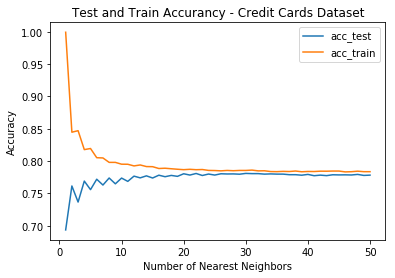

In [71]:
from sklearn.neighbors import KNeighborsClassifier

maxNN = 51
df_test_acc = pd.DataFrame(columns=['n_neighbors','acc_test'])
df_train_acc = pd.DataFrame(columns=['n_neighbors','acc_train'])
for x in range(1, maxNN,1):
    model = KNeighborsClassifier(n_neighbors=x)
    # Train KNN Classifer
    start = time.time()
    model = model.fit(X_train, y_train)
    end = time.time()
    print "KNN training time", end - start , "seconds!"
    #Predict the response for test dataset
    predictedNNTest = model.predict(X_test)
    predictedNNTrain = model.predict(X_train)
    
    acc_testNN = accuracy_score(y_test, predictedNNTest)
    acc_trainNN = accuracy_score(y_train, predictedNNTrain)    

    df_test_acc = df_test_acc.append({'n_neighbors': x, 'acc_test':acc_testNN}, ignore_index=True)
    df_train_acc= df_train_acc.append({'n_neighbors': x, 'acc_train':acc_trainNN}, ignore_index=True)
    
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Accuracy')
plt.title('Test and Train Accurancy - Credit Cards Dataset')
plt.plot(df_test_acc['n_neighbors'],df_test_acc['acc_test'])
plt.plot(df_train_acc['n_neighbors'],df_train_acc['acc_train'])
plt.legend()


plt.show()
 

In [50]:
## KNN Model (Caesarian)

KNN training time 0.00071907043457 seconds!
KNN training time 0.000588893890381 seconds!
KNN training time 0.000371932983398 seconds!
KNN training time 0.000349998474121 seconds!
KNN training time 0.00033712387085 seconds!
KNN training time 0.000406980514526 seconds!
KNN training time 0.00032377243042 seconds!
KNN training time 0.000300168991089 seconds!
KNN training time 0.000357866287231 seconds!
KNN training time 0.000294923782349 seconds!
KNN training time 0.000298976898193 seconds!
KNN training time 0.000331878662109 seconds!
KNN training time 0.000321865081787 seconds!
KNN training time 0.000324964523315 seconds!
KNN training time 0.000349044799805 seconds!
KNN training time 0.000287055969238 seconds!
KNN training time 0.000303983688354 seconds!
KNN training time 0.000293970108032 seconds!
KNN training time 0.000284910202026 seconds!
KNN training time 0.000291109085083 seconds!
KNN training time 0.000288009643555 seconds!
KNN training time 0.000283002853394 seconds!
KNN training 

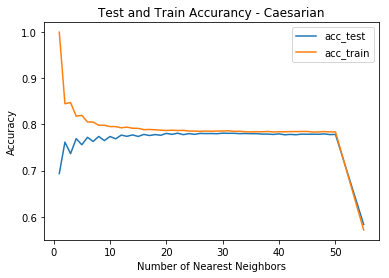

In [76]:
maxNN1 = 56
df_test_acc1 = pd.DataFrame(columns=['n_neighbors','acc_test'])
df_train_acc1 = pd.DataFrame(columns=['n_neighbors','acc_train'])
for x in range(1, maxNN1,1):
    model1 = KNeighborsClassifier(n_neighbors=x)
    # Train Neural Network Classifer
    start = time.time()
    model1 = model1.fit(X_train1, y_train1)
    end = time.time()
    print "KNN training time", end - start , "seconds!"
    #Predict the response for test dataset
    predictedNNTest1 = model1.predict(X_test1)
    predictedNNTrain1 = model1.predict(X_train1)
    
    acc_testNN1 = accuracy_score(y_test1, predictedNNTest1)
    acc_trainNN1 = accuracy_score(y_train1, predictedNNTrain1)    

    df_test_acc1 = df_test_acc.append({'n_neighbors': x, 'acc_test':acc_testNN1}, ignore_index=True)
    df_train_acc1= df_train_acc.append({'n_neighbors': x, 'acc_train':acc_trainNN1}, ignore_index=True)
    
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Accuracy')
plt.title('Test and Train Accurancy - Caesarian')
plt.plot(df_test_acc1['n_neighbors'],df_test_acc1['acc_test'])
plt.plot(df_train_acc1['n_neighbors'],df_train_acc1['acc_train'])
plt.legend()


plt.show()
 

# SVM Model (Credit Card)

Training time 8.33791208267
('Accuracy:', 0.7786666666666666)
Training time 30.008587122
('Accuracy:', 0.7832222222222223)
Training time 7.04738402367
('Accuracy:', 0.7755555555555556)


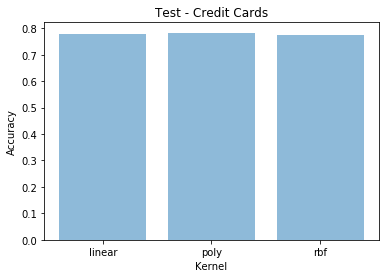

In [6]:
import time
import numpy as np
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn import svm

y = df_ccc['DEFAULTS_NEXT_MONTH']
X = df_ccc[['PAY_0','PAY_2','PAY_3']]

X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.3, random_state=1) 
lsKernel = ['linear','poly','rbf']
df_test_svm_sub = pd.DataFrame(columns=['Kernel','acc'])
n_estimators = 5
for k in lsKernel:
    start = time.time()
    clf = OneVsRestClassifier(BaggingClassifier(SVC(kernel=k, probability=True, class_weight='balanced'), max_samples=1.0 / n_estimators, n_estimators=n_estimators))
    clf.fit(X_train_sub, y_train_sub)
    end = time.time()
    print "Training time", end - start
    y_pred_sub = clf.predict(X_test_sub)
    acc_sub = metrics.accuracy_score(y_test_sub, y_pred_sub)
    print("Accuracy:",acc_sub)
    df_test_svm_sub = df_test_svm_sub.append({'Kernel': k, 'acc':acc_sub}, ignore_index=True)
    

plt.bar(df_test_svm_sub['Kernel'],df_test_svm_sub['acc'], align='center', alpha=0.5)
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Test - Credit Cards')
plt.show()



## SVM Model (Cesarian)

Training time 0.0310819149017
('Accuracy:', 0.4583333333333333)
Training time 0.258903980255
('Accuracy:', 0.7916666666666666)
Training time 0.0187149047852
('Accuracy:', 0.375)


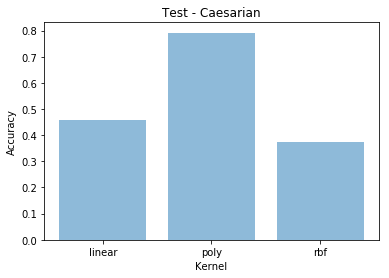

In [49]:
#Import svm model
##from sklearn import svm

#Create a svm Classifier
##clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
##clf.fit(X_train, y_train)

#Predict the response for test dataset
##y_pred = clf.predict(X_test)

import time
import numpy as np
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
#Import svm model
from sklearn import svm



lsKernel = ['linear','poly','rbf']
df_test_svm1 = pd.DataFrame(columns=['Kernel','acc'])
n_estimators = 5
for k in lsKernel:
    start = time.time()
    clf = OneVsRestClassifier(BaggingClassifier(SVC(kernel=k, probability=True, class_weight='balanced'), max_samples=1.0 / n_estimators, n_estimators=n_estimators))
    clf.fit(X_train1, y_train1)
    end = time.time()
    print "Training time", end - start
    y_pred1 = clf.predict(X_test1)
    acc = metrics.accuracy_score(y_test1, y_pred1)
    print("Accuracy:",acc)
    df_test_svm1 = df_test_svm1.append({'Kernel': k, 'acc':acc}, ignore_index=True)
    

plt.bar(df_test_svm1['Kernel'],df_test_svm1['acc'], align='center', alpha=0.5)
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Test - Caesarian')
plt.show()
